{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [55.0, 55.0, 73.75, 73.75],
  [45.0, 45.0, 64.375, 64.375],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [332.5, 332.5, 360.0, 360.0],
  [315.0, 315.0, 346.25, 346.25],
  [300.0, 300.0, 330.625, 330.625],
  [395.0, 395.0, 405.0, 405.0],
  [385.0, 385.0, 400.0, 400.0],
  [375.0, 375.0, 392.5, 392.5],
  [455.0, 455.0, 465.0, 465.0],
  [445.0, 445.0, 460.0, 460.0],
  [435.0, 435.0, 452.5, 452.5],
  [425.0, 425.0, 443.75, 443.75],
  [485.0, 485.0, 495.0, 495.0],
  [475.0, 475.0, 490.0, 490.0],
  [515.0, 

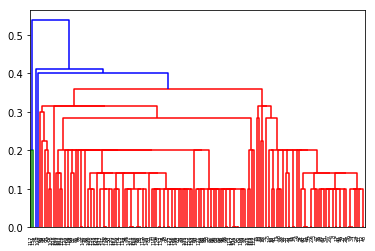

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage

iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]


Z = linkage(X)

dendrogram(Z)  




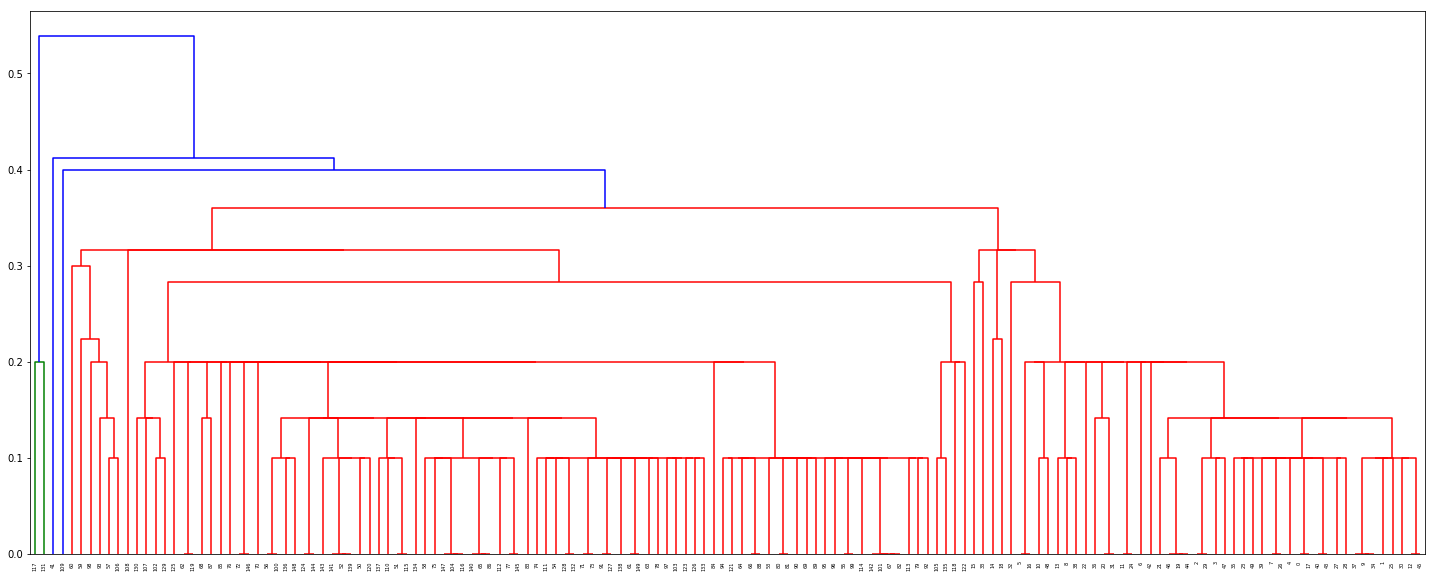

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]  
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

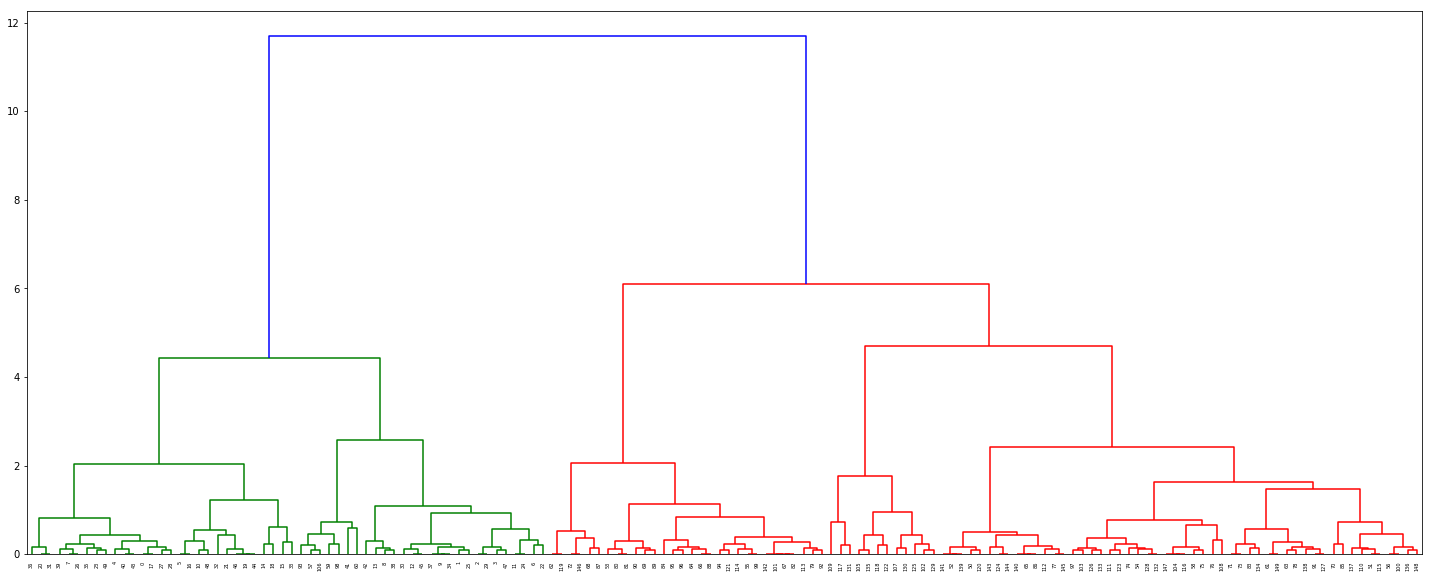

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]  
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

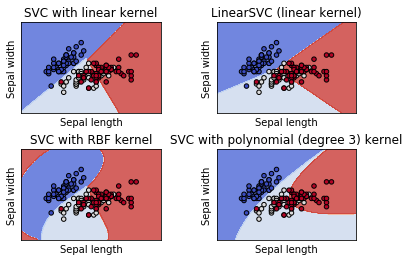

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [1]:

import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris()
iris =load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

 
# Split data to train and test on 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)
 
# Plot traning and test data
plt.data(X_train, y_train, X_test, y_test)
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
 
# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf)
clf_predictions = clf.predict(X_test)
print("Accuracy: {}%".format(clf.score(X_test, y_test) * 100 ))
clf = svm.SVC(kernel='rbf', C = 10.0, gamma=0.1)
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}
 
# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
 
# Train the classifier
clf_grid.fit(X_train, y_train)
 
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

SyntaxError: invalid syntax (<ipython-input-1-81b29804acc3>, line 7)

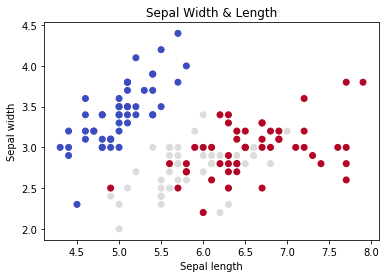

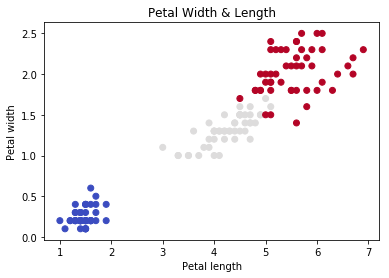

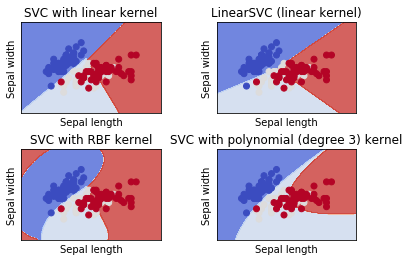

In [13]:
from sklearn import datasets		# To Get iris dataset
from sklearn import svm    			# To fit the svm classifier
import numpy as np
import matplotlib.pyplot as plt   


def visuvalize_sepal_data():
	iris = datasets.load_iris()
	X = iris.data[:, :2]  # we only take the first two features.
	y = iris.target
	plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
	plt.xlabel('Sepal length')
	plt.ylabel('Sepal width')
	plt.title('Sepal Width & Length')
	plt.show()
 
visuvalize_sepal_data()

def visuvalize_petal_data():
	iris = datasets.load_iris()
	X = iris.data[:, 2:]  # we only take the last two features.
	y = iris.target
	plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
	plt.xlabel('Petal length')
	plt.ylabel('Petal width')
	plt.title('Petal Width & Length')
	plt.show()
 
visuvalize_petal_data()

h = .02
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the Sepal two features.
y = iris.target
C = 1.0  # SVM regularization parameter
 
# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(X, y)
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	                     np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
	   'LinearSVC (linear kernel)',
	    'SVC with RBF kernel',
	    'SVC with polynomial (degree 3) kernel']
 
 
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
	 # Plot the decision boundary. For that, we will assign a color to each
	 # point in the mesh [x_min, x_max]x[y_min, y_max].
	 plt.subplot(2, 2, i + 1)
	 plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
	 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
	 # Put the result into a color plot
	 Z = Z.reshape(xx.shape)
	 plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
	 # Plot also the training points
	 plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
	 plt.xlabel('Sepal length')
	 plt.ylabel('Sepal width')
	 plt.xlim(xx.min(), xx.max())
	 plt.ylim(yy.min(), yy.max())
	 plt.xticks(())
	 plt.yticks(())
	 plt.title(titles[i])
 
plt.show()

In [16]:
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np  
from sklearn.cluster import AgglomerativeClustering
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
data = iris.data[:, :2]

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  

cluster.fit_predict(data)

array([4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 0, 0, 4,
       4, 0, 4, 0, 4, 4, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 3, 1, 1, 3, 0, 3, 1, 3,
       1, 1, 1, 2, 2, 1, 1, 3, 3, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int64)

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_


from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(linkage="ward",n_clusters=3)
singleLinkage = model.fit(X)
model.labels_

model = AgglomerativeClustering(linkage="complete",n_clusters=3)
singleLinkage = model.fit(X)
model.labels_


model = AgglomerativeClustering(linkage="average",n_clusters=3)
singleLinkage = model.fit(X)
model.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)